<h3 align="center"><span style='font-family:arial'>WiDA: FIFA Women's World Cup 1991-2019 Feature Analysis</h3>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
fifa = pd.read_excel('fifa_women.xlsx')
print(fifa.shape)
fifa.head()

(136, 22)


,country_code,squad,year,players,age,possesion,matches_played,starts,min_playing_time,minutes_played_90s,...,non_penalty_goals,penalty_kicks_made,penalty_kicks_attempted,yellow_cards,red_cards,goals_per_90,assists_per_90,goals_plus_assists_per_90,goals_minus_penalty_kicks_per_90,goals_plus_assists_minus_penalty_kicks_per_90
0,ARG,Argentina,2019,18,26.8,34.7,3,33,270,3.0,...,1,1,1,3,0,0.67,0.33,1.00,0.33,0.67
1,AUS,Australia,2019,18,25.4,61.3,4,44,390,4.3,...,8,0,1,2,0,1.85,0.92,2.77,1.85,2.77
2,BRA,Brazil,2019,18,29.7,51.5,4,44,390,4.3,...,5,2,3,7,0,1.62,0.69,2.31,1.15,1.85
3,CMR,Cameroon,2019,20,27.7,36.0,4,44,360,4.0,...,3,0,0,6,0,0.75,0.75,1.50,0.75,1.50
4,CAN,Canada,2019,16,27.0,63.0,4,44,360,4.0,...,4,0,1,2,0,1.00,0.75,1.75,1.00,1.75


In [3]:
# Make copy of original dataset
df = fifa.copy()

# Exploration

In [4]:
# setting the theme
sns.set_theme()
# for image quality of the graphics
sns.set(rc = {"figure.dpi":350})
# for size of the graphics
sns.set(rc = {"figure.figsize":(8,3)})

In [5]:
# Features of the categorical columns
categorical = [feat for feat in df.columns if df[feat].dtype == 'O']
categorical

['country_code', 'squad']

In [6]:
# Features of the numerical columns
numerical = [feat for feat in df.columns if df[feat].dtype != 'O']
numerical

['year',
 'players',
 'age',
 'possesion',
 'matches_played',
 'starts',
 'min_playing_time',
 'minutes_played_90s',
 'goals',
 'assists',
 'non_penalty_goals',
 'penalty_kicks_made',
 'penalty_kicks_attempted',
 'yellow_cards',
 'red_cards',
 'goals_per_90',
 'assists_per_90',
 'goals_plus_assists_per_90',
 'goals_minus_penalty_kicks_per_90',
 'goals_plus_assists_minus_penalty_kicks_per_90']

In [7]:
# looking at all the distinct elements in each feature

for column in df:
    unique_vals = np.unique(df[column])
    nb_values = len(unique_vals)
    if nb_values < 10:
        print('Unique values for {} :{} -- {}'.format(column, nb_values,unique_vals))
    else:
        print('Unique values for {} :{}'.format(column, nb_values))

Unique values for country_code :36
Unique values for squad :36
Unique values for year :8 -- [1991 1995 1999 2003 2007 2011 2015 2019]
Unique values for players :11
Unique values for age :62
Unique values for possesion :75
Unique values for matches_played :5 -- [3 4 5 6 7]
Unique values for starts :5 -- [33 44 55 66 77]
Unique values for min_playing_time :17
Unique values for minutes_played_90s :17
Unique values for goals :22
Unique values for assists :15
Unique values for non_penalty_goals :22
Unique values for penalty_kicks_made :5 -- [0 1 2 3 4]
Unique values for penalty_kicks_attempted :5 -- [0 1 2 3 4]
Unique values for yellow_cards :12
Unique values for red_cards :3 -- [0 1 2]
Unique values for goals_per_90 :50
Unique values for assists_per_90 :40
Unique values for goals_plus_assists_per_90 :61
Unique values for goals_minus_penalty_kicks_per_90 :50
Unique values for goals_plus_assists_minus_penalty_kicks_per_90 :58


> Correlation

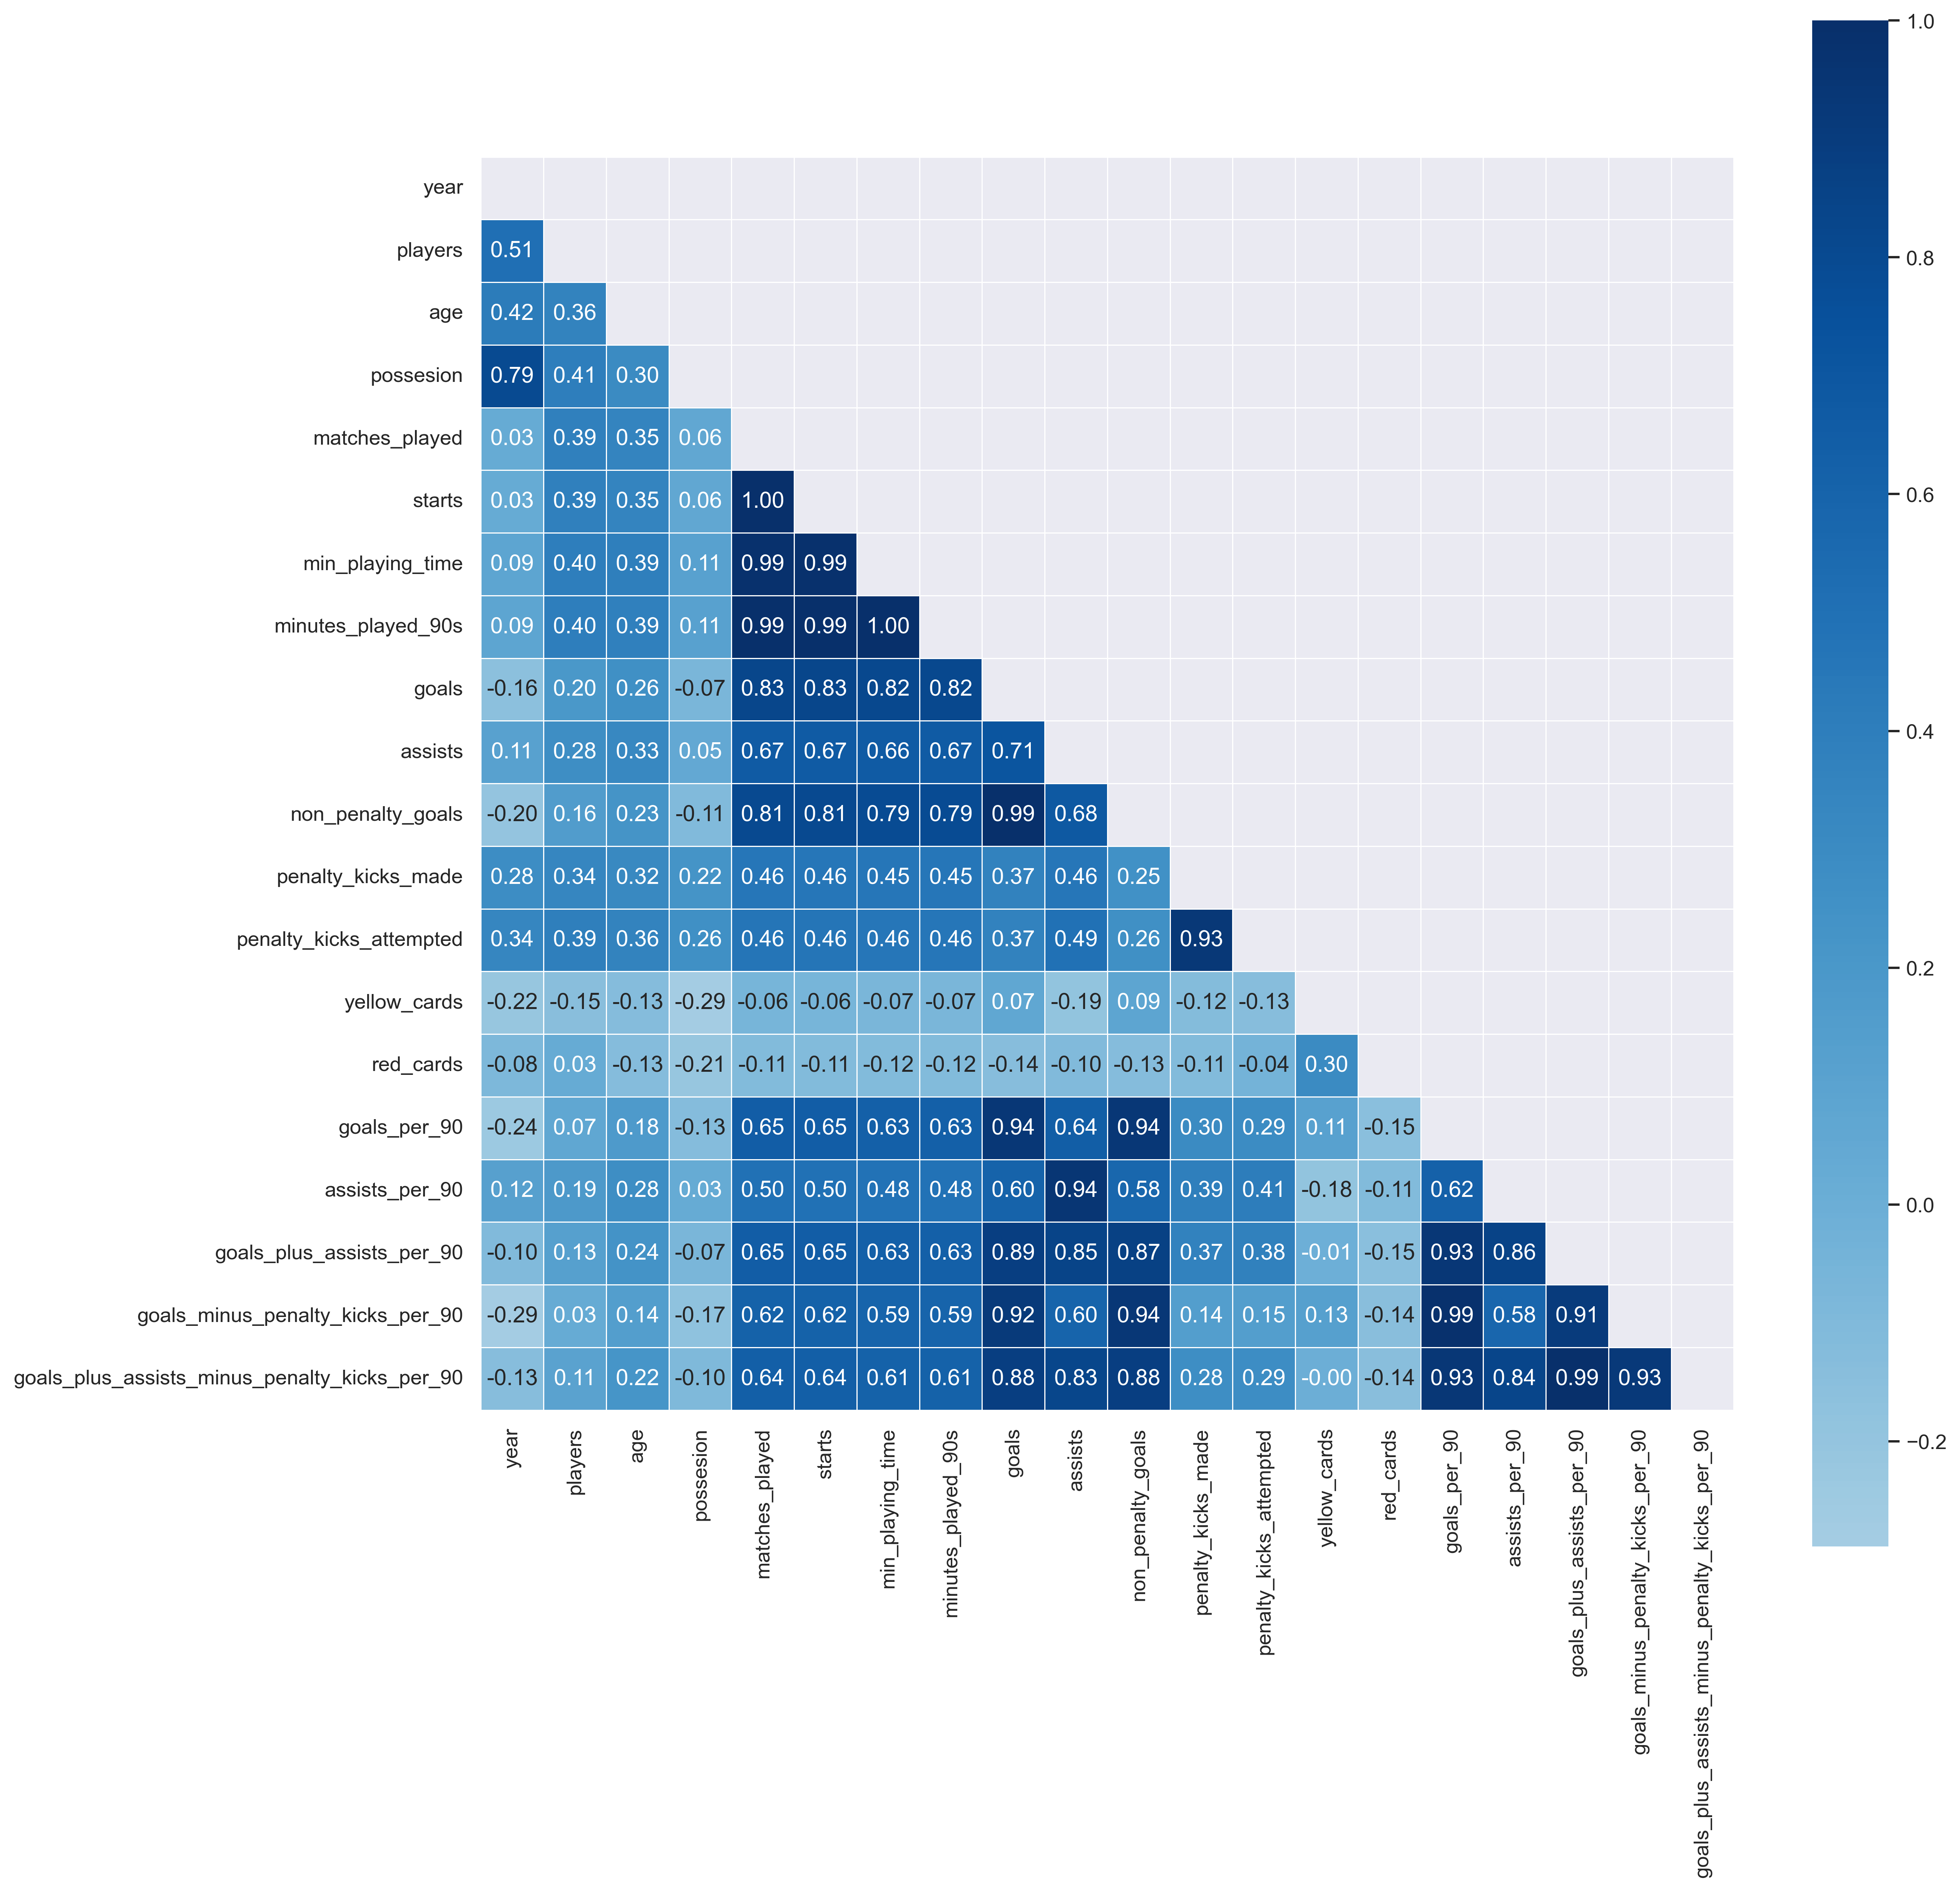

In [8]:
corr_f = df.corr()
matrix = np.triu(corr_f)
plt.figure(figsize=(15, 15))
sns.heatmap(corr_f,
            mask = matrix,
            center=0,
            annot=True,
            linewidth=0.6,
            fmt='.2f',
            square=True,
            cmap='Blues');

    The bulk of the features are multicollinear, except
           all features with the 'year' (excluding 'players', 'age', 'possesion' that have a moderate-high correlation)
           'year', 'player', 'age', and 'possesion' are not dependent on all the other features (excluding each other)
           'goals' and all the other features(excluding 'year', 'players', 'age', 'possesion')
           'assists' and all the other features(excluding 'year', 'players', 'age', 'possesion')
           'non_penalty_goals' and all the other features(excluding 'year', 'players', 'age', 'possesion')
        'yellow_cards' and 'red_cards' with the other features,
        'goals_per_90' and all the other features 
        (excluding 'year', 'players', 'age', 'possesion', 'yellow_cards', 'red_cards')
        'assists_per_90' and all the other features 
        (excluding 'year', 'players', 'age', 'possesion', 'yellow_cards', 'red_cards')
        'goals_plus_assists_per_90' and all the other features 
        (excluding 'year', 'players', 'age', 'possesion', 'yellow_cards', 'red_cards')
        'goal_minus_penalty_kicks_per_90' and all features 
        (excluding 'year', 'players','age', 'possesion', 'red_cards, 'yellow_cards')
        'goals_plus_assists_minus_penalty_kicks_per_90' and all features 
        (excluding 'year', 'players','age', 'possesion', 'red_cards, 'yellow_cards')
    
    
    
    
    

> Statistical Summary

In [11]:
df.describe()

,year,players,age,possesion,matches_played,starts,min_playing_time,minutes_played_90s,goals,assists,non_penalty_goals,penalty_kicks_made,penalty_kicks_attempted,yellow_cards,red_cards,goals_per_90,assists_per_90,goals_plus_assists_per_90,goals_minus_penalty_kicks_per_90,goals_plus_assists_minus_penalty_kicks_per_90
count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,2007.117647,17.330882,25.274265,34.766176,4.176471,45.941176,378.147059,4.200735,6.566176,3.154412,6.161765,0.404412,0.463235,3.573529,0.102941,1.375735,0.651324,2.027574,1.294265,1.946397
std,9.159540,1.712936,1.962462,23.191858,1.298902,14.287920,122.916565,1.361780,5.764132,3.612486,5.528674,0.754038,0.859872,2.693290,0.328395,0.923320,0.633787,1.405935,0.898872,1.365997
min,1991.000000,13.000000,18.200000,0.000000,3.000000,33.000000,240.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1999.000000,16.000000,24.275000,0.000000,3.000000,33.000000,270.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.670000,0.000000,1.000000,0.600000,0.787500
50%,2007.000000,17.000000,25.300000,47.000000,4.000000,44.000000,360.000000,4.000000,5.000000,2.000000,4.500000,0.000000,0.000000,3.000000,0.000000,1.250000,0.500000,1.750000,1.075000,1.725000
75%,2015.000000,18.000000,26.800000,51.850000,5.000000,55.000000,480.000000,5.300000,10.000000,5.000000,9.000000,1.000000,1.000000,5.000000,0.000000,1.947500,1.000000,3.000000,1.800000,3.000000
max,2019.000000,23.000000,29.700000,63.000000,7.000000,77.000000,690.000000,7.700000,25.000000,17.000000,25.000000,4.000000,4.000000,11.000000,2.000000,4.690000,2.430000,6.750000,4.500000,6.560000


- `year` starting from 1991 - 2019

- `players` average number of players = **17.33**, usually between **17-18*8 players but can be as high **23** and low as **13**

- `age` average age = **25.27 years**, usually between **24.27-26.80 years**  but can be as high **29.70 years** and low as **18.20 years**
   
- `possesion` average = **34.76 %**, usually between **80.00-51.58 %** but can be as high **63.30 % ** and low as **0.00 %**
    
- `matches_played` average match = **4.18 matches**, usually between **3-5 matches** but can be as high **7 matches** and low as **3 matches**,
    
    
- `starts` average start = **45.94**, usually between **33.00-55.00** but can be as high **77.00*8 and low as **33.00**
    
    
- `min_playing_time` average time = **378.15 mins**, usually between **270-480 mins** but can be as high **690 mins** and low as **240 mins**
    
    
- `minutes_played_90s` average minutes = **4.2 mins**, usually between **3.0-5.3 mins** but can be as high **7.7 mins** and low as **2.7 mins**
    
    
- `goals` average goals = **6.57 goals**, usually between **2-10 goals** but can be as high **25 goals** and low as **0 goals**
   
    
- `assists` average assist = **3.15 assists**, usually between **0-5 assists** but can be as high **17 assists** and low as **0 assists**
    
    
- `non_penalty_goals` average goals = **6.16 goals**, usually between **2-9 goals** but can be as high **25 goals** and low as **0 goals**
    
    
- `penalty_kicks_made` average kick= **0.40 kicks**, usually between **0-1 kicks** but can be as high **4 kicks** and low as **0 kicks** 
    
    
- `penalty_kicks_attempted` average attempts = **0.46 attempts**, usually between **0-1 attempts*8 but can be as high **4 attempts** and low as **0 attempts**
    
    
- `yellow_cards` average cards = **3.57 cards**, usually between **1-5 cards**,  but can be as high **11 cards** and low as **0 cards**,
    
    
- `red_cards` average cards = **0.10 cards**, usually just **0 cards**,  but can be as high **2 cards** and low as **0 cards**
    
    
- `goals_per_90` average goals = **1.38 goals**, usually between **0.67-1.95 goals**,  but can be as high **4.69 goals** and low as **0 goals**
    
    
- `assists_per_90` average assists = **0.65 assists**, usually between **0.0-1.0 assists**,  but can be as high **2.43 assists** and low as **0 assists**
    
    
- `goals_minus_penalty_kicks_per_90` average goals = **1.29 goals**, usually between **0.60-1.80 goals**,  but can be as high **4.50 goals** and low as **0 goals**

- `goals_plus_assists_minus_penalty_kicks_per_90` average goals = **1.94 goals**, usually between **0.78-3.0 goals**,  but can be as high **6.56 goals** and low as **0 goals**